### Working through first data set. More in depth look at variables and available info.  

### relationship between price and ratings

### relationship between sale price and ratings

### relationship between ratings and brands.  are some brands more highly rated?

### what subcategories of makeup are most highly rated

### relationship between skincare ingredients and price

### the most expensive skincare ingredients and ratings

### compare some of these results beteen thw big data set and the one from three years ago. change in trends since pandemic?

### does a limited edition item get better ratings 

### do online only products get rated better

### what words occur most frequently in positive reviews

### what are the average and median prices per subcategory of products

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url_1 = 'https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews'


df_1 = pd.read_csv('c:\sephora\product_info.csv', delimiter=',')

# Realiza operaciones con el DataFrame
#print(df_1.info)
#print(df_1.dtypes)

# Imprime el DataFrame
print(df_1)

     product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count  

In [13]:
print(df_1.shape)

(8494, 27)


In [14]:
print(df_1.columns)

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')


In [15]:
df_1.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [16]:
print(df_1['primary_category'].nunique())
print(df_1['primary_category'].unique())

9
['Fragrance' 'Bath & Body' 'Mini Size' 'Hair' 'Makeup' 'Skincare'
 'Tools & Brushes' 'Men' 'Gifts']


In [17]:
print(df_1.describe())

          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000     

In [18]:
#print(df_1.info)
print(df_1.dtypes)

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object


In [19]:
df_2 = df_1[df_1['primary_category']=='Makeup']
print(df_2)

     product_id                                       product_name  brand_id  \
65      P398965                               Rose Lip Conditioner      7054   
189     P503741                                  Lip Treatment Oil      7103   
190     P503754                  Skin-Enhancing Tinted Moisturizer      7103   
191     P503762   Lash-Amplifying Volumizing & Lengthening Mascara      7103   
192     P503732           Skin Melt Talc-Free Loose Setting Powder      7103   
...         ...                                                ...       ...   
8473    P474604   NU TONE CORRECTOR Color Corrector with Vitamin E      1070   
8480    P483501               Mini Rouge Pur Couture Exclusive Set      1070   
8484    P467660             Mascara Volume Effet Faux Cils Radical      1070   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count  

In [20]:
print(df_2.shape)

(2369, 27)


In [21]:
print(df_2.describe())

          brand_id   loves_count       rating       reviews    price_usd  \
count  2369.000000  2.369000e+03  2328.000000   2328.000000  2369.000000   
mean   5120.040523  5.423549e+04     4.146845    681.998282    32.757995   
std    1683.804898  1.004252e+05     0.513878   1608.242011    18.659477   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    3976.000000  8.304000e+03     3.928600     44.000000    22.000000   
50%    5879.000000  2.238700e+04     4.252300    209.000000    29.000000   
75%    6236.000000  5.347000e+04     4.491500    625.000000    39.000000   
max    8000.000000  1.401068e+06     5.000000  21281.000000   320.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       104.000000      143.000000      2369.000000  2369.000000   
mean         59.725962       14.866014         0.086957     0.061207   
std          36.841360        8.740776         0.281831     0.239761   
min           0.000000     

In [22]:
df_2.corr()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
brand_id,1.000000,-0.030707,-0.040180,-0.067558,-0.061991,-0.155879,0.214850,0.020098,0.028812,-0.002059,-0.045242,0.138276,-0.086904,-0.180188,-0.170449
loves_count,-0.030707,1.000000,0.107379,0.698475,-0.011337,0.043260,-0.090188,-0.108575,-0.063344,-0.122921,-0.098311,-0.048806,0.410328,0.030715,-0.044752
rating,-0.040180,0.107379,1.000000,0.085912,0.079495,0.012694,0.007216,-0.022494,0.033237,-0.099546,-0.072760,0.065567,0.047188,0.062471,0.075900
reviews,-0.067558,0.698475,0.085912,1.000000,-0.011660,-0.185986,-0.014234,-0.114509,-0.065756,-0.115596,-0.093321,-0.111055,0.311305,0.011700,-0.089171
price_usd,-0.061991,-0.011337,0.079495,-0.011660,1.000000,0.775246,0.931542,0.112693,-0.025478,0.122582,-0.029736,-0.154356,0.043620,0.919165,0.857567
value_price_usd,-0.155879,0.043260,0.012694,-0.185986,0.775246,1.000000,0.852562,0.076515,-0.089112,0.111820,-0.052604,-0.013279,-0.141772,0.775130,0.867884
sale_price_usd,0.214850,-0.090188,0.007216,-0.014234,0.931542,0.852562,1.000000,0.114309,NaN,0.207913,-0.155796,-0.304635,-0.028662,0.750569,0.761639
limited_edition,0.020098,-0.108575,-0.022494,-0.114509,0.112693,0.076515,0.114309,1.000000,0.108689,0.125230,0.226765,0.078774,-0.133540,0.044584,0.048568
new,0.028812,-0.063344,0.033237,-0.065756,-0.025478,-0.089112,NaN,0.108689,1.000000,0.112091,0.011682,0.079452,0.021259,-0.000097,0.009425
online_only,-0.002059,-0.122921,-0.099546,-0.115596,0.122582,0.111820,0.207913,0.125230,0.112091,1.000000,0.039123,-0.062033,-0.068262,0.097076,0.104593


In [23]:
print(df_2['tertiary_category'].nunique())
print(df_2['tertiary_category'].unique())

41
['Lip Balm & Treatment' 'Tinted Moisturizer' 'Mascara'
 'Setting Spray & Powder' 'Highlighter' 'Concealer' 'Eyebrow' 'Blush'
 'Face Sets' 'Eyeshadow' 'Lipstick' 'Eye Palettes' 'Contour' 'Lip Gloss'
 'Eye Brushes' 'Foundation' 'False Eyelashes' 'Cheek Palettes' 'Lip Liner'
 nan 'Bronzer' 'Face Brushes' 'Tweezers & Eyebrow Tools' 'Eye Sets'
 'Eye Primer' 'Eyeliner' 'Liquid Lipstick' 'Face Primer' 'Lip Sets'
 'BB & CC Cream' 'Sponges & Applicators' 'Brush Cleaners'
 'Makeup Removers' 'Brush Sets' 'Color Correct' 'Lip Plumper' 'Lip Stain'
 'Eyelash Curlers' 'Makeup Bags & Travel Cases' 'Under-Eye Concealer'
 'Blotting Papers' 'Lip Brushes']


In [24]:
df_3 = df_2[df_2['tertiary_category']=='Eye Palettes']
print(df_3)

     product_id                                       product_name  brand_id  \
251     P409118              Modern Renaissance Eye Shadow Palette      5746   
252   P58930227                        Soft Glam Eyeshadow Palette      5746   
279     P463420               Mini Soft Glam II Eye Shadow Palette      5746   
304     P500629                          Nouveau Eyeshadow Palette      5746   
323     P503556                  Mini Glam To Go Eyeshadow Palette      5746   
...         ...                                                ...       ...   
8208    P460733  Sakura Blossom Eyeshadow and Pressed Pigment P...      6232   
8209    P454982                      Matte Vibes Eyeshadow Palette      6232   
8210    P468858             I Love U Cherry Much Eyeshadow Palette      6232   
8269    P428669                      Petit PRO 2 Eyeshadow Palette      7072   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   

                   brand_name  loves_co

In [25]:
df_3.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
251,P409118,Modern Renaissance Eye Shadow Palette,5746,Anastasia Beverly Hills,460449,4.7931,9133.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
252,P58930227,Soft Glam Eyeshadow Palette,5746,Anastasia Beverly Hills,329192,4.7068,2858.0,NaN,NaN,NaN,...,0,0,0,"['Radiant Finish', 'Community Favorite', 'Shim...",Makeup,Eye,Eye Palettes,0,NaN,NaN
279,P463420,Mini Soft Glam II Eye Shadow Palette,5746,Anastasia Beverly Hills,45762,4.3553,76.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
304,P500629,Nouveau Eyeshadow Palette,5746,Anastasia Beverly Hills,26598,4.6911,492.0,NaN,NaN,NaN,...,0,0,0,"['Natural Finish', 'Metallic Finish', 'Matte F...",Makeup,Eye,Eye Palettes,0,NaN,NaN
323,P503556,Mini Glam To Go Eyeshadow Palette,5746,Anastasia Beverly Hills,15336,4.6667,9.0,NaN,NaN,NaN,...,0,0,0,"['Without Phthalates', 'Oil Free', 'Without Pa...",Makeup,Eye,Eye Palettes,0,NaN,NaN


In [26]:
print(df_3.describe())

          brand_id    loves_count      rating      reviews   price_usd  \
count   135.000000     135.000000  132.000000   132.000000  135.000000   
mean   5504.200000   58224.874074    4.204567   445.636364   54.948148   
std    1376.842797   84847.593435    0.543120  1109.112445   31.056837   
min    1063.000000     299.000000    1.666700     3.000000    8.000000   
25%    5648.000000   10708.000000    3.966400    23.750000   32.000000   
50%    6160.000000   27304.000000    4.340250   123.500000   49.000000   
75%    6236.000000   62019.500000    4.545425   354.500000   65.000000   
max    7072.000000  460449.000000    5.000000  9133.000000  152.000000   

       value_price_usd  sale_price_usd  limited_edition         new  \
count              1.0       13.000000       135.000000  135.000000   
mean              32.0       17.300000         0.281481    0.088889   
std                NaN       10.745076         0.451397    0.285643   
min               32.0        5.000000         0.

In [27]:
df_3.corr()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
brand_id,1.000000,-0.040912,-0.029828,-0.049717,-0.082081,NaN,0.618692,-0.018547,0.084375,-0.144723,-0.068525,0.156755,-0.116170,-0.095148,-0.094697
loves_count,-0.040912,1.000000,0.161480,0.842789,-0.060385,NaN,0.343878,-0.316351,-0.190927,-0.202452,-0.104428,-0.133413,0.304164,-0.070516,-0.061319
rating,-0.029828,0.161480,1.000000,0.189820,0.214868,NaN,-0.384784,-0.036014,-0.079217,-0.097039,-0.108818,0.000631,-0.106739,0.062494,0.100925
reviews,-0.049717,0.842789,0.189820,1.000000,-0.021768,NaN,0.205552,-0.221024,-0.107673,-0.122492,-0.086952,-0.173023,0.070970,0.157121,0.160589
price_usd,-0.082081,-0.060385,0.214868,-0.021768,1.000000,NaN,0.958839,-0.045796,-0.073505,0.166255,-0.254632,0.027016,-0.073369,0.905823,0.907858
value_price_usd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_price_usd,0.618692,0.343878,-0.384784,0.205552,0.958839,NaN,1.000000,-0.329291,NaN,0.173369,-0.789458,-0.292533,-0.209721,NaN,NaN
limited_edition,-0.018547,-0.316351,-0.036014,-0.221024,-0.045796,NaN,-0.329291,1.000000,0.325403,0.273329,0.165278,0.060553,-0.099361,0.042302,0.050010
new,0.084375,-0.190927,-0.079217,-0.107673,-0.073505,NaN,NaN,0.325403,1.000000,0.320633,-0.020870,0.082519,0.095270,-0.011192,-0.003484
online_only,-0.144723,-0.202452,-0.097039,-0.122492,0.166255,NaN,0.173369,0.273329,0.320633,1.000000,-0.036009,-0.064731,-0.077401,0.579651,0.576318


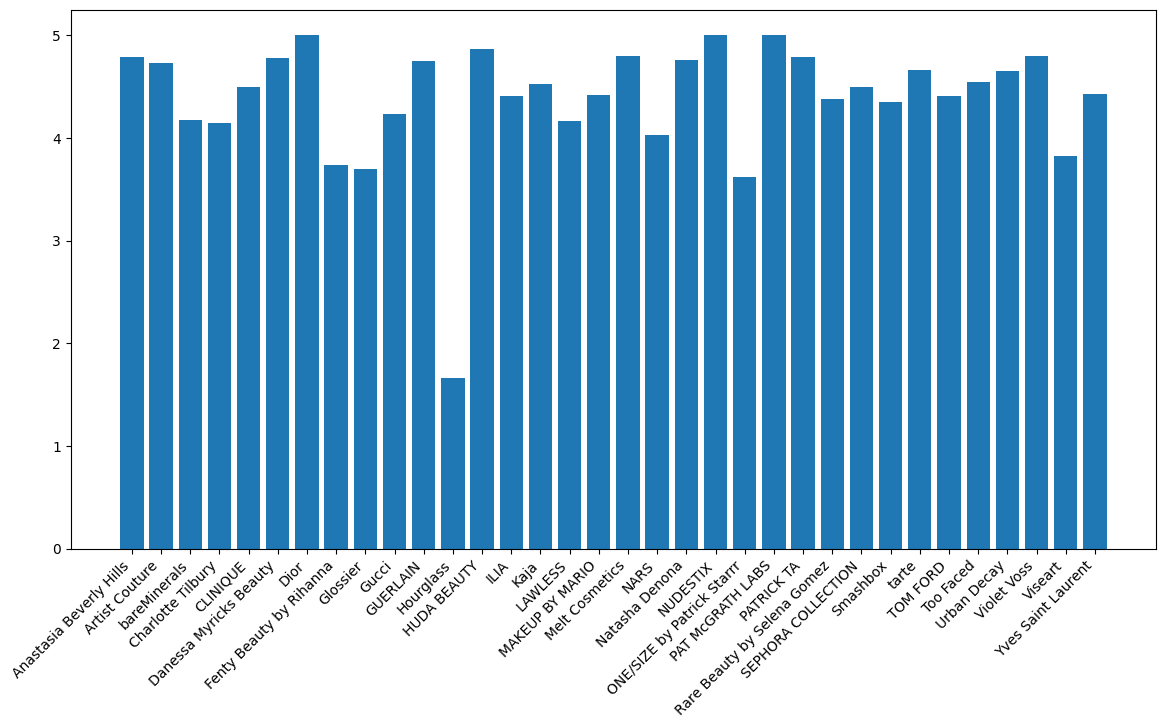

In [28]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=45, ha='right')
plt.bar(df_3['brand_name'], df_3['rating'])
plt.show()

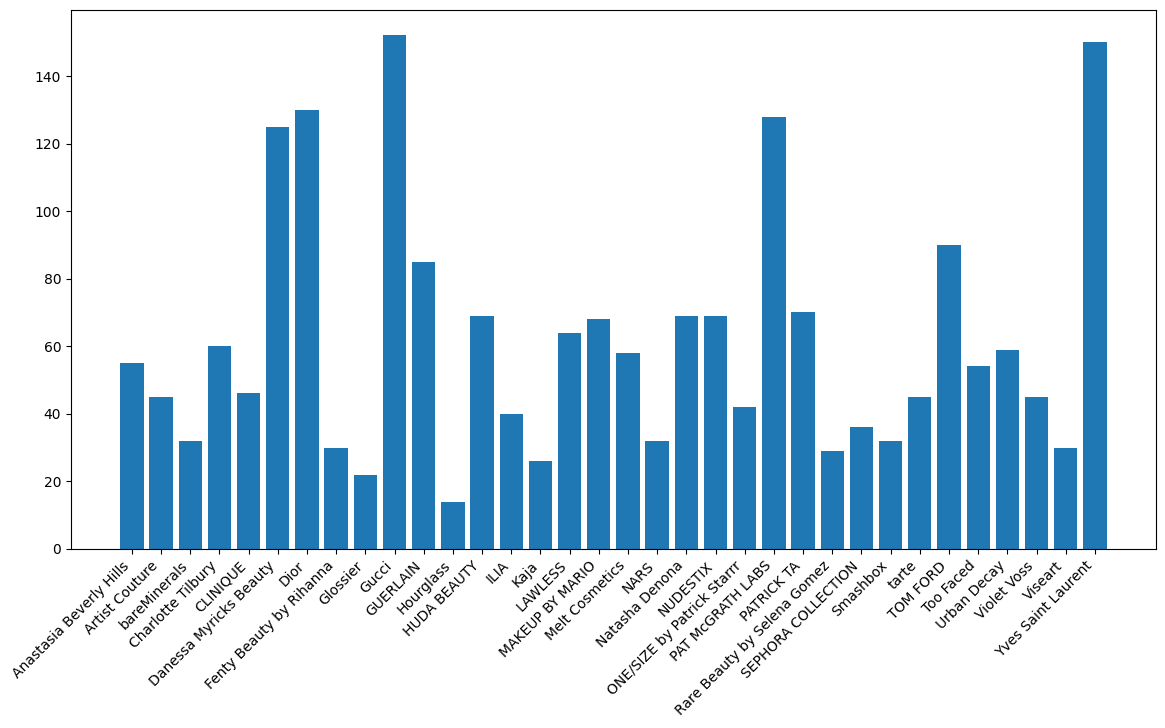

In [29]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=45, ha='right')
plt.bar(df_3['brand_name'], df_3['price_usd'])
plt.show()

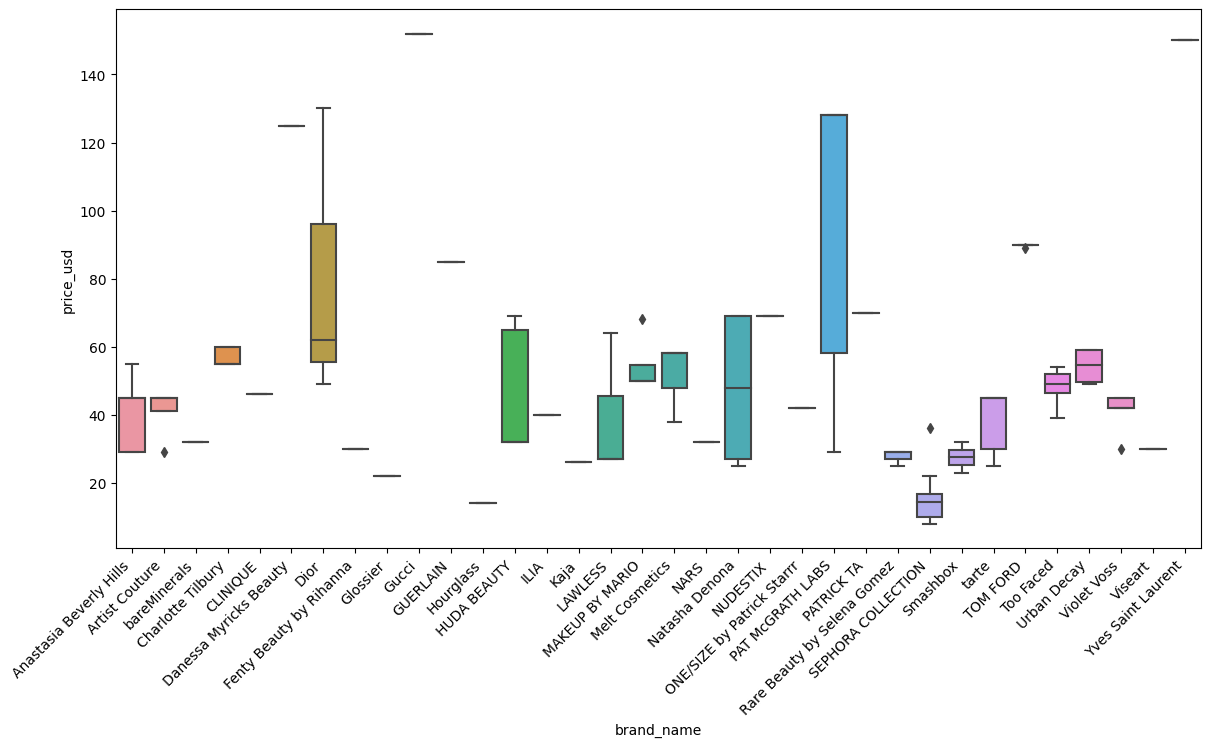

In [30]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=45, ha='right')
sns.boxplot(data = df_3, x=df_3['brand_name'], y=df_3['price_usd'])
plt.show()

In [31]:
df_ms = df_1.loc[(df_1['primary_category']=='Makeup') | (df_1['primary_category']=='Skincare')]
print(df_ms)

     product_id                                       product_name  brand_id  \
65      P398965                               Rose Lip Conditioner      7054   
89      P439055               GENIUS Sleeping Collagen Moisturizer      6018   
90      P421277                       GENIUS Liquid Collagen Serum      6018   
91      P467602            Triple Algae Eye Renewal Balm Eye Cream      6018   
92      P432045               GENIUS Liquid Collagen Lip Treatment      6018   
...         ...                                                ...       ...   
8473    P474604   NU TONE CORRECTOR Color Corrector with Vitamin E      1070   
8480    P483501               Mini Rouge Pur Couture Exclusive Set      1070   
8484    P467660             Mascara Volume Effet Faux Cils Radical      1070   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count  

In [42]:
df_ms.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
65,P398965,Rose Lip Conditioner,7054,AERIN,20562,4.2600,527.0,0.34 oz/ 10 mL,Scent,1 Rose,...,1,0,0,"['Hydrating', 'Good for: Dryness']",Makeup,Lip,Lip Balm & Treatment,0,NaN,NaN
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments,Face Serums,1,25.0,25.0
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,NaN,NaN,NaN,...,0,0,1,NaN,Skincare,Eye Care,Eye Creams & Treatments,0,NaN,NaN
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,.5 oz / 15 mL,Size,.5 oz / 15 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments,NaN,0,NaN,NaN


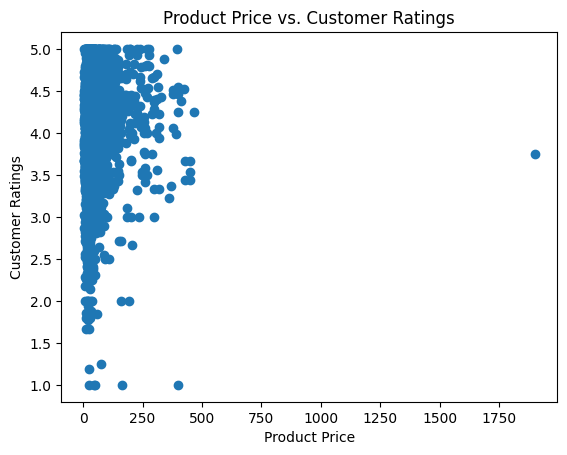

In [32]:
plt.scatter(df_ms['price_usd'], df_ms['rating'])

# Set labels and title

plt.xlabel("Product Price")
plt.ylabel("Customer Ratings")
plt.title("Product Price vs. Customer Ratings")

# Display the plot
plt.show()

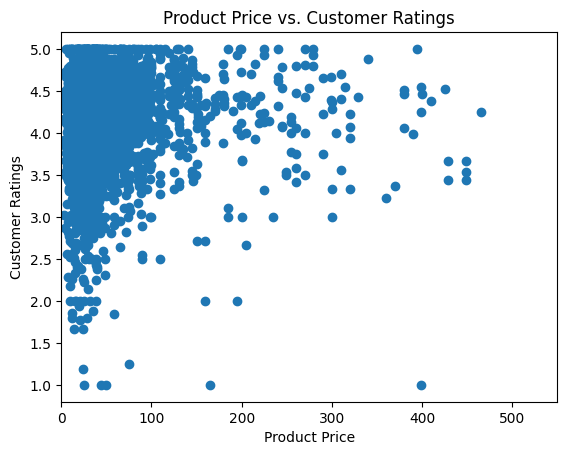

In [33]:
plt.scatter(df_ms['price_usd'], df_ms['rating'])

# Set labels and title
plt.xlim(0,550)
plt.xlabel("Product Price")
plt.ylabel("Customer Ratings")
plt.title("Product Price vs. Customer Ratings")

# Display the plot
plt.show()

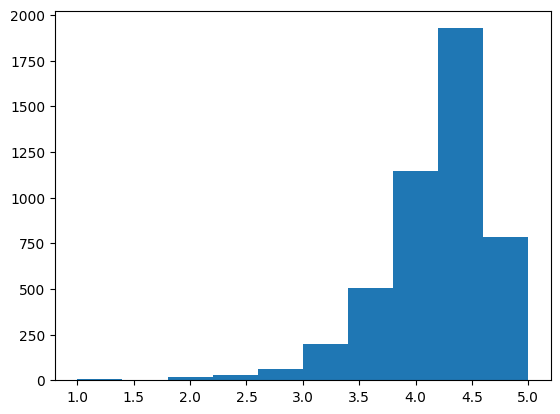

In [34]:
plt.hist(x=df_ms['rating'])
plt.show()

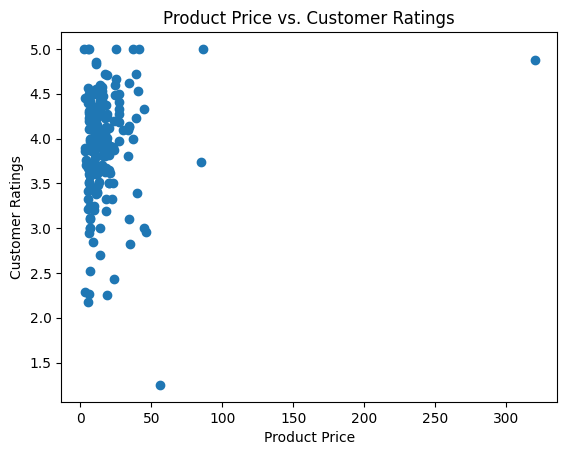

In [35]:
plt.scatter(df_ms['sale_price_usd'], df_ms['rating'])

# Set labels and title
plt.xlabel("Product Price")
plt.ylabel("Customer Ratings")
plt.title("Product Price vs. Customer Ratings")

# Display the plot
plt.show()

In [36]:
print(df_ms['tertiary_category'].nunique())
print(df_ms['tertiary_category'].unique())

69
['Lip Balm & Treatment' 'Moisturizers' 'Face Serums'
 'Eye Creams & Treatments' nan 'Face Sunscreen' 'Face Wash & Cleansers'
 'Face Oils' 'Toners' 'Face Masks' 'Facial Peels'
 'Decollete & Neck Creams' 'Exfoliators' 'Tinted Moisturizer' 'Mascara'
 'Setting Spray & Powder' 'Highlighter' 'Concealer' 'Eyebrow' 'Blush'
 'Face Sets' 'Eyeshadow' 'Lipstick' 'Eye Palettes' 'Contour' 'Lip Gloss'
 'Eye Brushes' 'Foundation' 'False Eyelashes' 'Cheek Palettes' 'Lip Liner'
 'Bronzer' 'Face Brushes' 'Tweezers & Eyebrow Tools' 'Eye Sets'
 'Eye Primer' 'Eyeliner' 'Liquid Lipstick' 'Face Primer' 'Lip Sets'
 'BB & CC Cream' 'Eye Masks' 'Facial Rollers' 'Anti-Aging' 'Face Wipes'
 'Blemish & Acne Treatments' 'Sponges & Applicators' 'Brush Cleaners'
 'Makeup Removers' 'Brush Sets' 'Night Creams' 'Mists & Essences'
 'Color Correct' 'Lip Plumper' 'Beauty Supplements' 'Body Sunscreen'
 'Sheet Masks' 'For Body' 'For Face' 'Facial Cleansing Brushes'
 'Hair Removal' 'Lip Stain' 'Eyelash Curlers' 'Makeup Bags 

In [ ]:
my_df = df_ms.loc[df_ms['tertiary_category']=='Moisturizers'|df_ms['tertiary_category']=='Tinted Moisturizer'| df_ms['tertiary_category']=='Mascara'|df_ms['tertiary_category']== 'Setting Spray & Powder'|df_ms['tertiary_category']== 'Highlighter'|df_ms['tertiary_category']== 'Concealer'|df_ms['tertiary_category']== 'Eyebrow'|df_ms['tertiary_category']== 'Blush'|
 df_ms['tertiary_category']=='Face Sets'|df_ms['tertiary_category']== 'Eyeshadow', 'Lipstick', 'Eye Palettes', 'Contour', 'Lip Gloss', 'Foundation', 'False Eyelashes', 'Cheek Palettes', 'Lip Liner',
 'Bronzer', 'Eye Sets','Eye Primer', 'Eyeliner', 'Liquid Lipstick', 'Face Primer', 'BB & CC Cream', 'Night Creams', 'Mists & Essences',
 'Color Correct', 'Lip Plumper', 'Lip Stain', 'BB & CC Creams', 'Under-Eye Concealer']

In [37]:
print(df_1['tertiary_category'].nunique())
print(df_1['tertiary_category'].unique())

118
['Perfume Gift Sets' 'Perfume' 'Rollerballs & Travel Size'
 'Body Lotions & Body Oils' nan 'Cologne' 'Diffusers'
 'Deodorant & Antiperspirant' 'Candles' 'Hair Masks'
 'Leave-In Conditioner' 'Shampoo' 'Hair Oil' 'Hair Styling Products'
 'Scalp Treatments' 'Conditioner' 'Lip Balm & Treatment' 'Moisturizers'
 'Face Serums' 'Eye Creams & Treatments' 'Face Sunscreen'
 'Face Wash & Cleansers' 'Face Oils' 'Toners' 'Face Masks' 'Facial Peels'
 'Hand Cream & Foot Cream' 'Decollete & Neck Creams' 'Exfoliators'
 'Hair Spray' 'Hair Primers' 'Tinted Moisturizer' 'Mascara'
 'Setting Spray & Powder' 'Highlighter' 'Concealer' 'Eyebrow' 'Blush'
 'Face Sets' 'Dry Shampoo' 'Curling Irons' 'Brushes & Combs'
 'Hair Straighteners & Flat Irons' 'Hair Dryers' 'Eyeshadow' 'Lipstick'
 'Eye Palettes' 'Contour' 'Lip Gloss' 'Eye Brushes' 'Foundation'
 'False Eyelashes' 'Cheek Palettes' 'Lip Liner' 'Bronzer' 'Face Brushes'
 'Tweezers & Eyebrow Tools' 'Eye Sets' 'Eye Primer' 'Eyeliner'
 'Sharpeners' 'Accessories

In [38]:
df_4 = df_1[df_1['tertiary_category']=='Moisturizers']
df_4.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
94,P384537,GENIUS Ultimate Anti-Aging Cream,6018,Algenist,19733,4.2525,503.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,0,"['Vegan', 'Collagen', 'Hypoallergenic', 'Good ...",Skincare,Moisturizers,Moisturizers,1,75.0,75.0
99,P296415,Overnight Restorative Cream,6018,Algenist,10578,4.3808,239.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,0,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN
101,P282935,Regenerative Anti-Aging Moisturizer,6018,Algenist,6807,4.2715,221.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,1,0,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN
104,P471000,Algae Niacinamide Moisture Veil,6018,Algenist,4845,4.6982,169.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,1,"['Liquid Formula', 'Best for Oily, Combo, Norm...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
106,P453818,GENIUS Collagen Calming Relief,6018,Algenist,11763,4.4640,125.0,1.35 oz/ 40 mL,Size,1.35 oz/ 40 mL,...,0,0,1,"['Vegan', 'Collagen', 'Hypoallergenic', 'Good ...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
112,P404168,POWER Advanced Wrinkle Fighter Moisturizer,6018,Algenist,5169,4.1818,77.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN
115,P420638,ELEVATE Advanced Lift Contouring Cream,6018,Algenist,3317,4.3243,37.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,0,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN
118,P442860,ALIVE Prebiotic Balancing Moisturizer SPF 15,6018,Algenist,1897,3.2000,30.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,1,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN
121,P503998,Algae Peptide Regenerative Moisturizer,6018,Algenist,442,NaN,NaN,2 oz / 60 mL,Size,2 oz / 60 mL,...,0,0,1,"['Vegan', 'Hydrating', 'Good for: Anti-Aging',...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN


In [40]:
sorted_df4 = df_4.sort_values(by='rating', ascending=False)
sorted_df4.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
2096,P448550,Brightening Face Cream,6302,Dr. Barbara Sturm,2000,5.0000,5.0,1.69 oz/ 50 mL,Size,1.69 oz/ 50 mL,...,0,0,0,"['Gluten Free', 'Cruelty-Free', 'Vegan', 'Clea...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
2445,P481397,Revitalizing Supreme+ Bright Soft Creme Moistu...,6089,Estée Lauder,1140,5.0000,1.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,1,0,0,"['Good for: Loss of firmness', 'Vitamin C', 'H...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
7190,P483693,Essential Comfort Moisture Cream,6307,Sulwhasoo,2324,5.0000,3.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,0,"['Hyaluronic Acid', 'Good for: Loss of firmnes...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
2090,P448544,Darker Skin Tones Face Cream,6302,Dr. Barbara Sturm,1685,5.0000,9.0,1.69 oz/ 50 mL,Size,1.69 oz/ 50 mL,...,0,0,0,"['Best for Oily, Combo, Normal Skin', 'Good fo...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
3671,P476571,Turbo Body Lotion Energizing Gel Moisturizer w...,3297,Jack Black,326,5.0000,1.0,16 oz/ 473 mL,Size,16 oz/ 473 mL,...,1,0,0,"['Hydrating', 'Without Parabens']",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
3315,P476686,Equilibrium Restorative Hydrating Cream,5879,Hourglass,876,5.0000,3.0,1.9 oz/ 54 g,Size,1.9 oz/ 54 g,...,0,0,0,"['Good for: Anti-Aging', 'Good for: Dryness', ...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
2023,P481971,Hydra Life Intense Sorbet Crème Moisturizer,1073,Dior,2201,5.0000,3.0,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,0,"['Cream Formula', 'Hydrating', 'Best for Dry S...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
1360,P501585,Super Restorative Anti-Aging Night Moisturizer,2082,Clarins,595,5.0000,2.0,1.7 oz / 50 mL,Size,1.7 oz / 50 mL,...,1,0,0,"['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
2631,P476496,Instant Reset Brightening Overnight Recovery G...,6352,Fenty Skin,8257,5.0000,8.0,1.7 oz/ 50 mL Refill,Size,1.7 oz/ 50 mL Refill,...,0,0,1,"['Refill Available', 'Hyaluronic Acid', 'Good ...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
6856,P423163,Future Solution LX Concentrated Balancing Soft...,5337,Shiseido,4608,4.9375,16.0,5.7 oz/ 170 mL,Size,5.7 oz/ 170 mL,...,1,0,0,NaN,Skincare,Moisturizers,Moisturizers,0,NaN,NaN


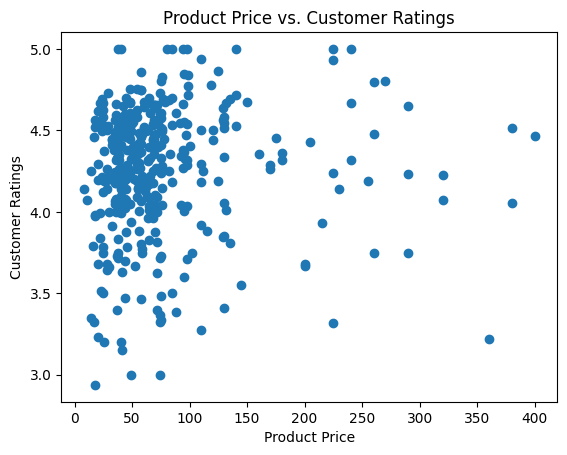

In [41]:
plt.scatter(df_4['price_usd'], df_4['rating'])

# Set labels and title

plt.xlabel("Product Price")
plt.ylabel("Customer Ratings")
plt.title("Product Price vs. Customer Ratings")

# Display the plot
plt.show()